In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [71]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

In [72]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [73]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [74]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [75]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month_name()

print(df[['Order Date', 'Year', 'Month']])

     Order Date  Year     Month
0    2016-11-08  2016  November
1    2016-11-08  2016  November
2    2016-06-12  2016      June
3    2015-10-11  2015   October
4    2015-10-11  2015   October
...         ...   ...       ...
9989 2014-01-21  2014   January
9990 2017-02-26  2017  February
9991 2017-02-26  2017  February
9992 2017-02-26  2017  February
9993 2017-05-04  2017       May

[9994 rows x 3 columns]


In [76]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df["Quantity"].sum()

print("Total Sales:", total_sales)
print("total_profit:", total_profit)
print("total_quantity", total_quantity)

Total Sales: 2297200.8603000003
total_profit: 286397.0217
total_quantity 37873


In [77]:
temp = df.groupby('Category')['Sales']
print(type(temp))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [78]:
category_sales = df.groupby("Category")['Sales'].sum().reset_index()
print(category_sales)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


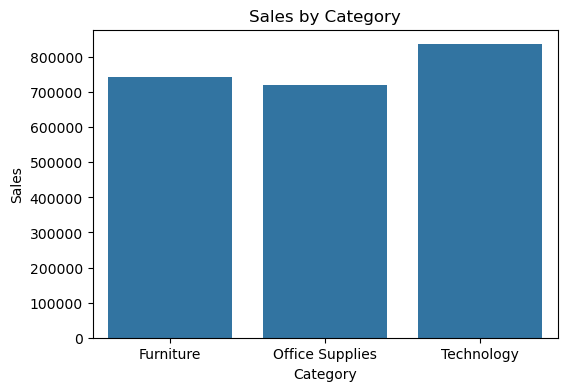

In [ ]:
#Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=category_sales, x="Category", y="Sales")
plt.title("Sales by Category")
plt.show()

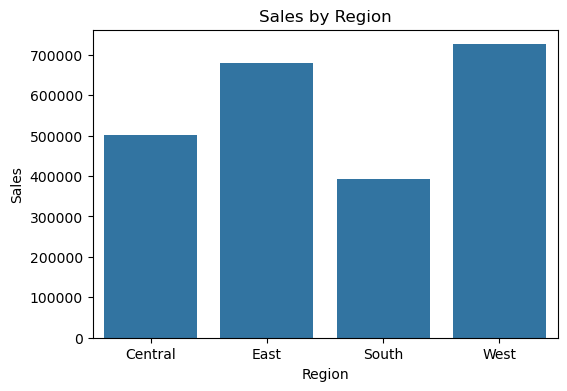

In [83]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title('Sales by Region')
plt.show()

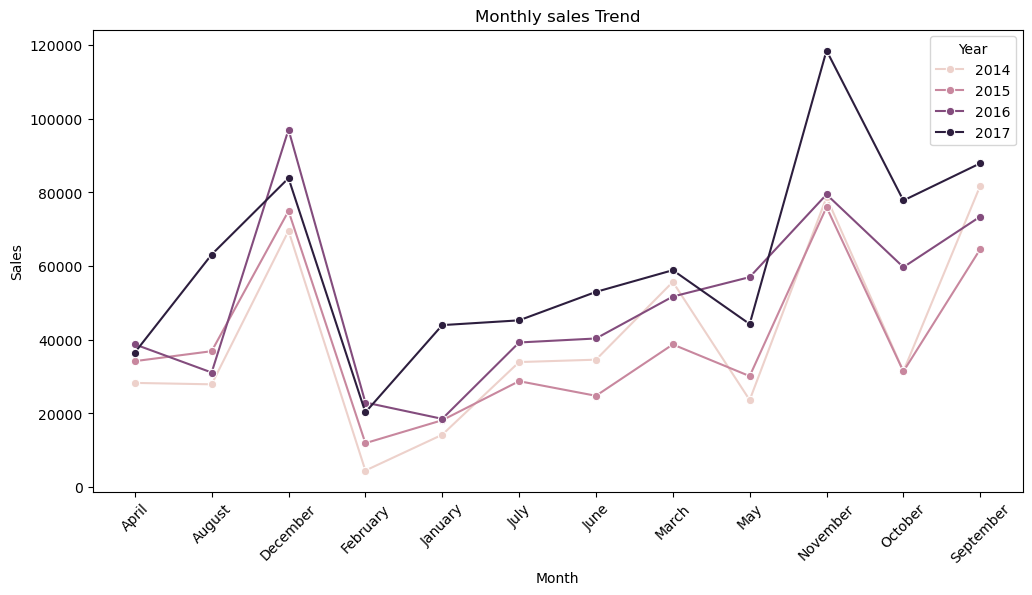

In [89]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x= 'Month', y='Sales', hue='Year', marker='o')
plt.title("Monthly sales Trend")
plt.xticks(rotation=45)
plt.show()

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


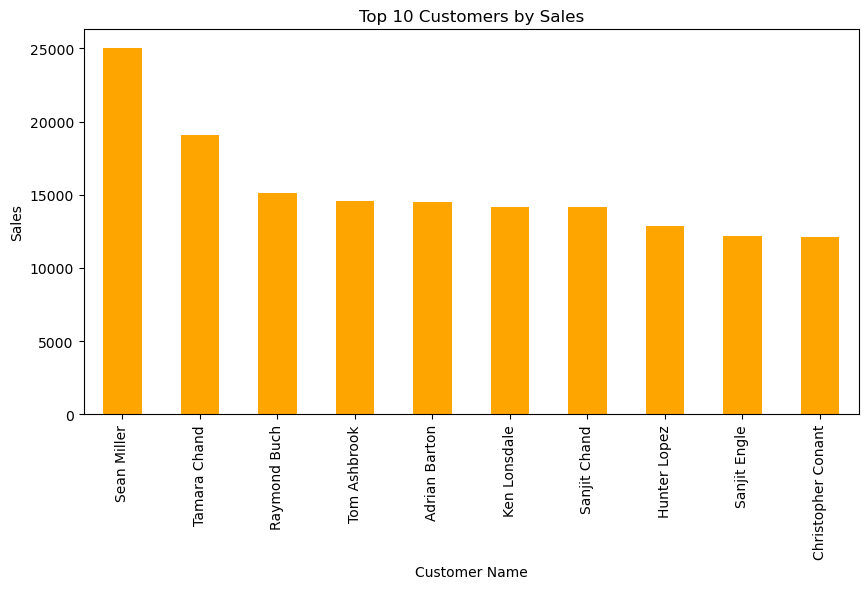

In [91]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

top_customers.plot(kind='bar', figsize=(10,5), color="orange")
plt.title("Top 10 Customers by Sales")
plt.ylabel("Sales")
plt.show()